# Problem Statement

### Salary_hike :- Build a prediction model for Salary_hike

### Import all the required libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [3]:
sd = pd.read_csv("Salary_Data.csv")
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
#Shape of the dataset:-
sd.shape

(30, 2)

#### This dataset have 30 rows and 2 variables.

In [4]:
##Checking datatypes:-
sd.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
##Statistical description of the data:-
sd.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [6]:
##Checking null values:-
sd.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

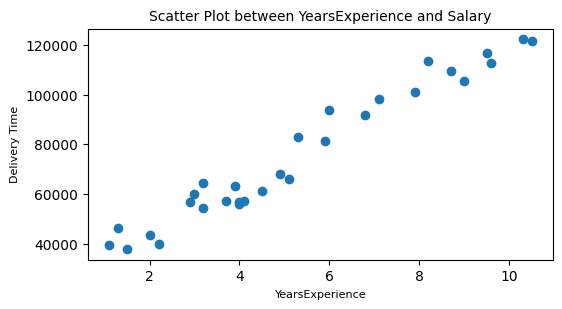

In [7]:
## Checking the relationship between both dependent and independent variables:-
plt.figure(figsize=(6,3))
plt.scatter(x = "YearsExperience", y = "Salary", data = sd)
plt.xlabel("YearsExperience",size = 8)
plt.ylabel("Delivery Time",size = 8)
plt.title("Scatter Plot between YearsExperience and Salary",size=10,color = "black")
plt.show()

<AxesSubplot: >

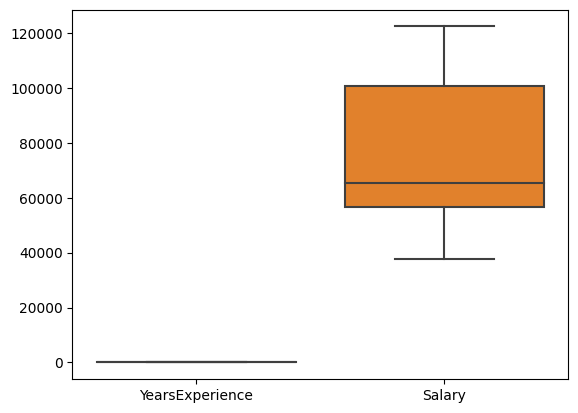

In [4]:
# Checking the outliers in the dataset using boxplot:-
sns.boxplot(data = sd)

In [8]:
##Checking correlation between both the variables:-
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Model Building 

In [9]:
model = smf.ols("Salary~YearsExperience",data=sd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        17:17:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [11]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [12]:
model.predict()

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

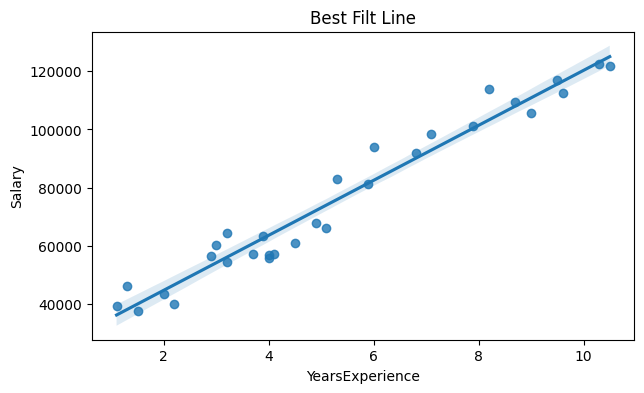

In [13]:
#Best Fit Line:-
plt.figure(figsize=(7,4))
sns.regplot(x="YearsExperience",y="Salary",data=sd)
plt.title("Best Filt Line")
plt.show()

In [14]:
#Using log function for YearsExperience to increase r-squared value:-
model2 = smf.ols('Salary~np.log(YearsExperience)',data=sd).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        17:19:03   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Using log function for Salary to increase r-squared value:-
model3 = smf.ols('np.log(Salary)~YearsExperience',data=sd).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           7.03e-18
Time:                        17:19:22   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model3.predict()

array([10.64540007, 10.67049065, 10.69558123, 10.75830768, 10.78339825,
       10.87121528, 10.88376056, 10.90885114, 10.90885114, 10.97157759,
       10.99666816, 11.00921345, 11.00921345, 11.02175874, 11.0719399 ,
       11.12212105, 11.14721163, 11.17230221, 11.24757394, 11.26011923,
       11.36048154, 11.39811741, 11.49847972, 11.53611559, 11.59884203,
       11.6364779 , 11.69920434, 11.71174963, 11.79956666, 11.82465723])